In [3]:
import pandas as pd
import joblib

In [4]:
from scipy.io import arff

data=pd.read_csv("dataset/Dataset.csv")
#data = arff.loadarff('dataset/Training Dataset.arff')
#df = pd.DataFrame(data[0])

#df.head(n=20)
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [5]:
urls = data.drop(data.columns[[10,19,20,21,22,24,26,27,28,29,30]],axis=1)

In [7]:
urls

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,age_of_domain,web_traffic
0,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,0,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,1,0,-1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,-1,0,1,1
3,1,0,1,1,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,1,0,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,0,0,-1,1,1,0,-1,0
5,-1,0,-1,1,-1,-1,1,1,-1,1,-1,1,0,0,-1,-1,-1,0,1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,1,-1,-1,0,-1,-1,-1,0,1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,1,0,-1,0
8,1,0,-1,1,1,-1,1,1,-1,1,-1,1,0,1,-1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,1,1,0,1,-1,1,1,0,1,0


In [6]:
 labels = data['Result']

In [9]:
labels

0       -1
1       -1
2       -1
3       -1
4        1
5        1
6       -1
7       -1
8        1
9       -1
10       1
11      -1
12      -1
13      -1
14       1
15      -1
16      -1
17      -1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26      -1
27       1
28       1
29       1
        ..
11025    1
11026    1
11027    1
11028    1
11029   -1
11030   -1
11031    1
11032   -1
11033    1
11034   -1
11035    1
11036    1
11037   -1
11038   -1
11039   -1
11040   -1
11041    1
11042    1
11043   -1
11044    1
11045    1
11046    1
11047   -1
11048    1
11049   -1
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data_train, data_test, labels_train, labels_test = train_test_split(urls, labels, test_size=0.20, random_state=110)

In [9]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [10]:
random_forest_classifier.fit(data_train,labels_train)

C:\Users\vinu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
prediction_label = random_forest_classifier.predict(data_test)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cpnfusionMatrix = confusion_matrix(labels_test,prediction_label)
print(cpnfusionMatrix)
accuracy_score(labels_test,prediction_label)

[[ 959   30]
 [  62 1160]]


0.95838986883763

In [28]:
joblib.dump(random_forest_classifier, 'rf1.pkl', compress=9)

['rf1.pkl']

In [29]:
data_train.shape

(8844, 20)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
importances = random_forest_classifier.feature_importances_

indices of columns : [ 7 12 19  6  5 13 11 18 14  0  8  1  9 15  2 10  3 17  4 16]

 ***Feature ranking: *** 

Feature name : Importance
1 SSLfinal_State   :  0.35730026914259194 

2 URL_of_Anchor   :  0.2371796475567783 

3 web_traffic   :  0.08577747996100485 

4 having_Sub_Domain   :  0.06855442844364809 

5 Prefix_Suffix   :  0.050624948550845705 

6 Links_in_tags   :  0.046287317678804604 

7 Request_URL   :  0.021960589370089306 

8 age_of_domain   :  0.02032770463209372 

9 SFH   :  0.0169115117161477 

10 having_IP_Address   :  0.015890836751514193 

11 Domain_registeration_length   :  0.014519954581265477 

12 URL_Length   :  0.010950207793830189 

13 Favicon   :  0.009981173541143619 

14 Submitting_to_email   :  0.008707991717067095 

15 Shortining_Service   :  0.007120285700036236 

16 HTTPS_token   :  0.006502714241256394 

17 having_At_Symbol   :  0.0062222615060703165 

18 Redirect   :  0.006205172860706978 

19 double_slash_redirecting   :  0.004559636307389903 

20 Abn

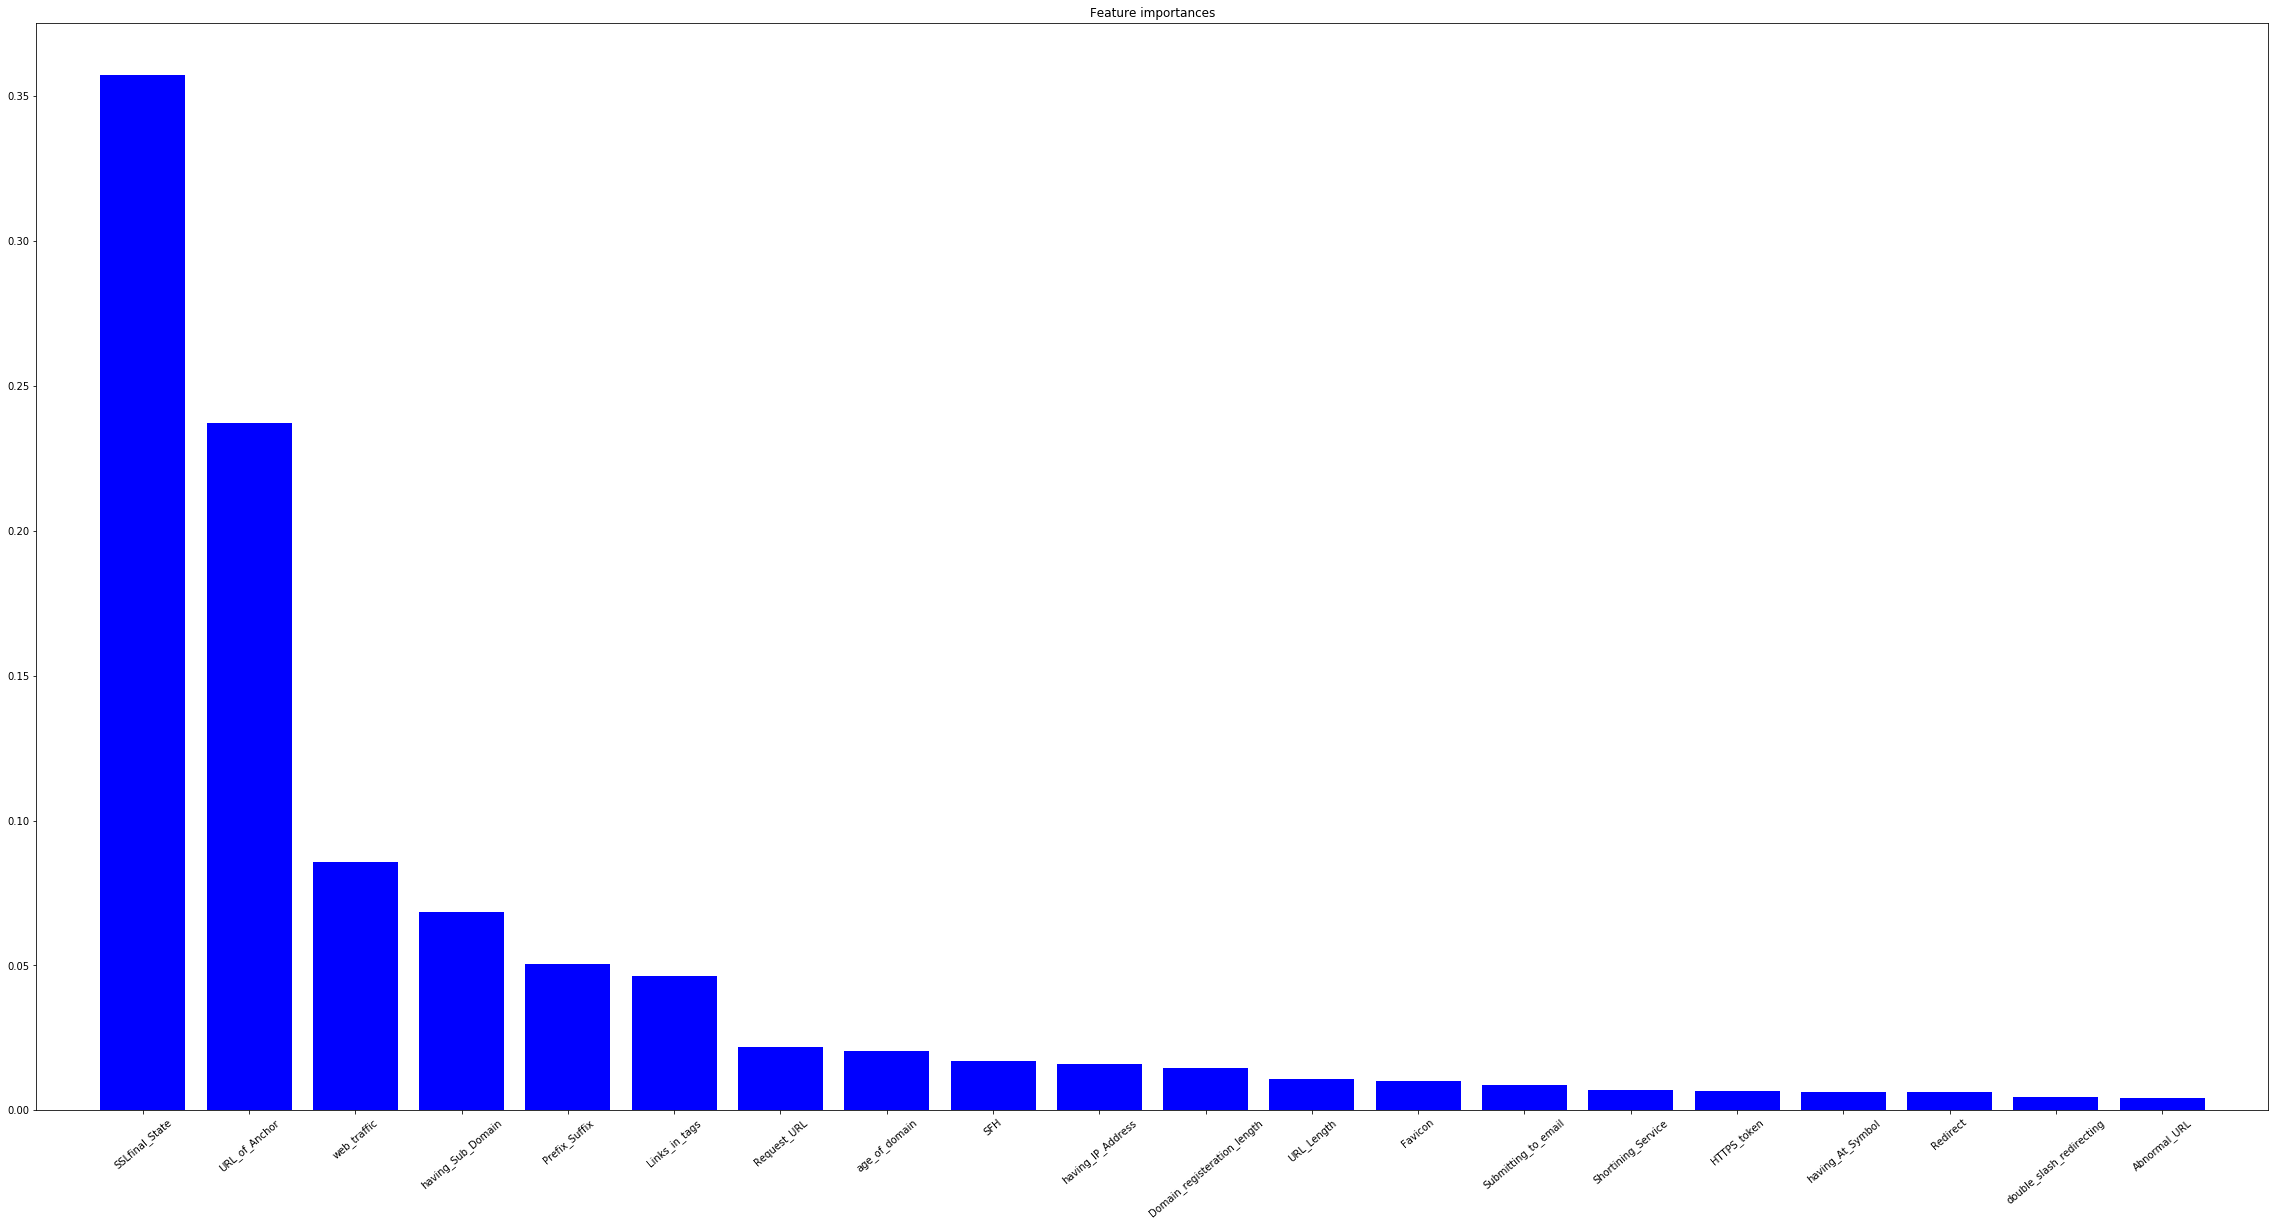

In [21]:
#To make the plot pretty, we’ll instead sort the features from most to least important.
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")

# Print the feature ranking
print("\n ***Feature ranking: *** \n")
print("Feature name : Importance")

for f in range(data_train.shape[1]):
    print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
print("**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],color="b", align="center")   
#yerr=std[indices] -- this is another parameter that can be included if std is calculated above
#and also it gives error bar that's the reason we calculate std above. but here we are not making it plot.

plt.xticks(range(data_train.shape[1]), data_train.columns[indices],rotation=40)
plt.xlim([-1, data_train.shape[1]])

plt.rcParams['figure.figsize'] = (20,5)  #this will increase the size of the plot
plt.show()